In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False, hline=True):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')
    
    # Plot a horizontal line at y=0
    if hline:
        plt.axhline(0, color='black', lw=0.5)

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'logs/log.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,D/loss_real,D/loss_fake,D/loss_cls,D/loss_dom,D/loss_gp,D/loss_td_real,D/loss_td_fake,G/loss_fake,G/loss_rec,G/loss_cls,G/loss_dom,G/loss_rot,G/loss_td_fake
0,0:00:07,100,-0.9640,0.1967,1.4644,4.1021,0.0004,-0.0816,0.0475,-0.2793,0.2675,1.4508,4.0983,0.3012,-0.0488
1,0:00:10,200,-0.7868,0.4165,1.3778,4.1126,0.0025,-0.0781,0.0720,-0.3507,0.1370,1.3897,4.1110,0.1543,-0.0729
2,0:00:14,300,-0.4902,0.0273,1.3838,4.1097,0.0038,-0.0711,0.0782,0.0049,0.1129,1.4131,4.1183,0.1544,-0.0770
3,0:00:17,400,-0.2864,-0.0560,1.3134,4.1109,0.0020,-0.0570,0.0699,0.0178,0.0987,1.4124,4.1172,0.1186,-0.0739
4,0:00:22,500,-0.2224,-0.1647,1.1965,4.1129,0.0016,-0.0477,0.0512,0.1594,0.1040,1.3765,4.1349,0.1215,-0.0466


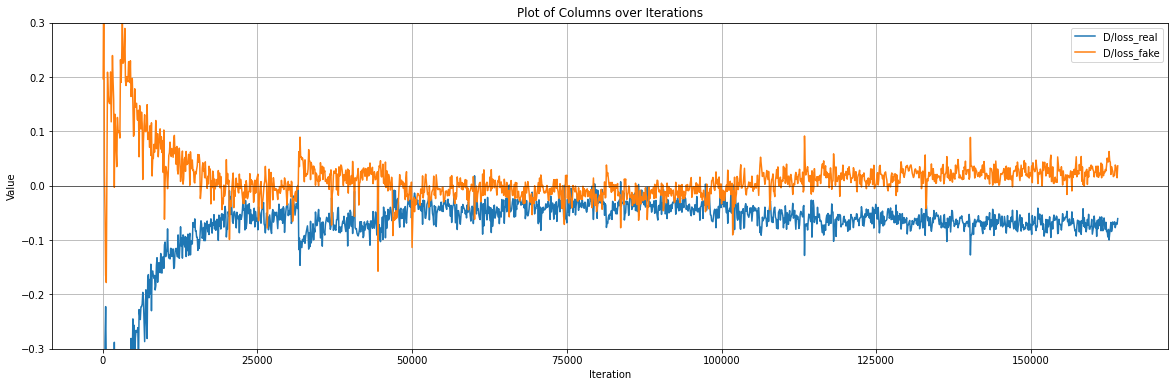

In [4]:
plot_columns(history, ['D/loss_real', 'D/loss_fake'], logaxis=False, ylim=(-0.3, 0.3))

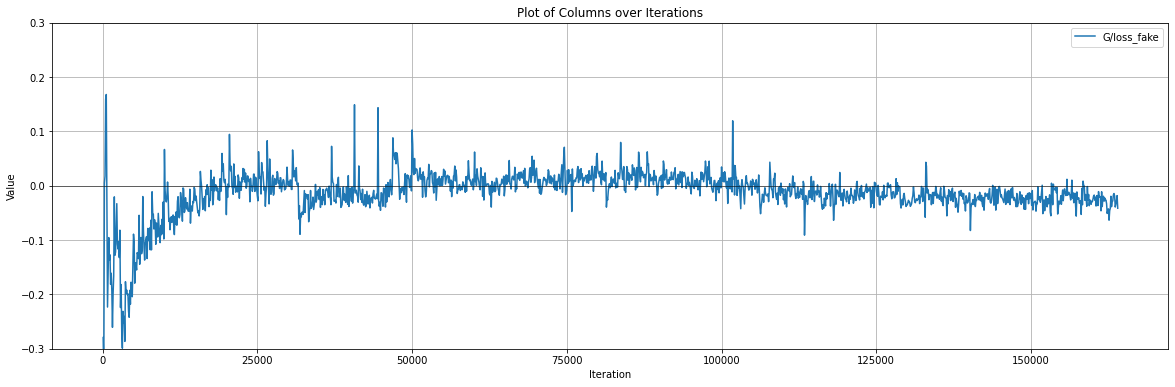

In [5]:
plot_columns(history, ['G/loss_fake'], logaxis=False, ylim=(-0.3, 0.3))

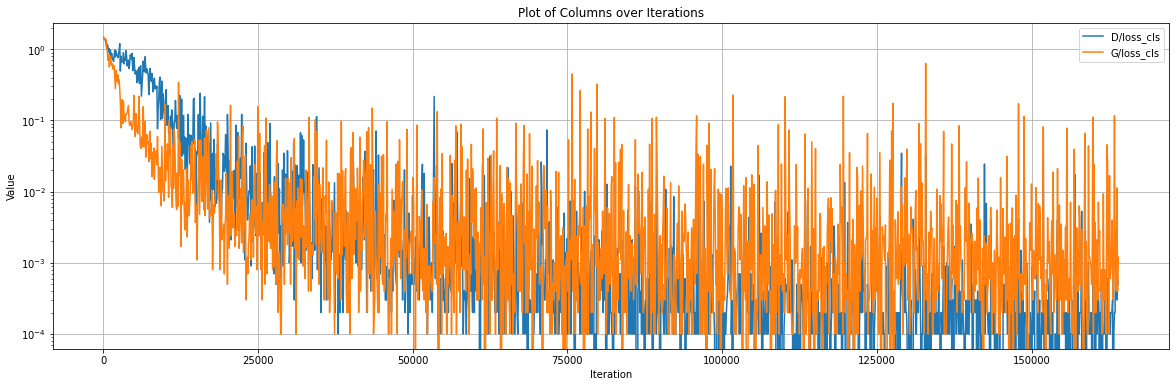

In [6]:
plot_columns(history, ['D/loss_cls', 'G/loss_cls'], logaxis=True)

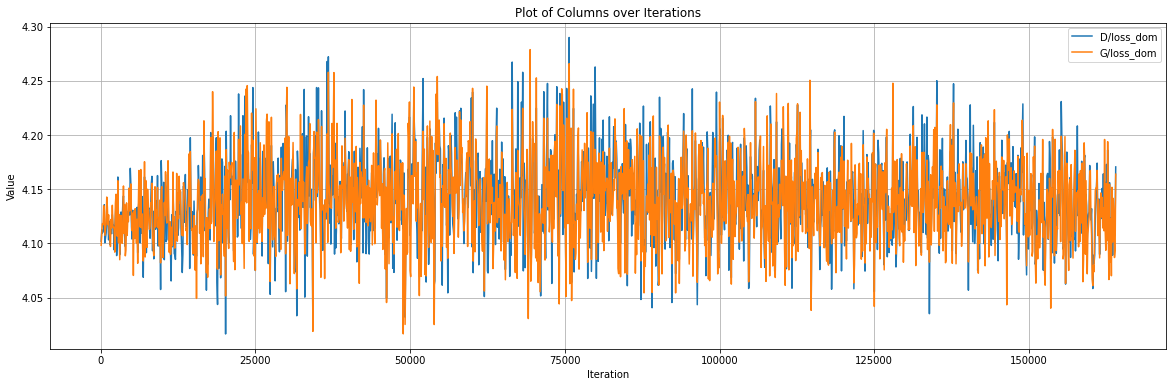

In [7]:
plot_columns(history, ['D/loss_dom', 'G/loss_dom'], logaxis=False, hline=False)

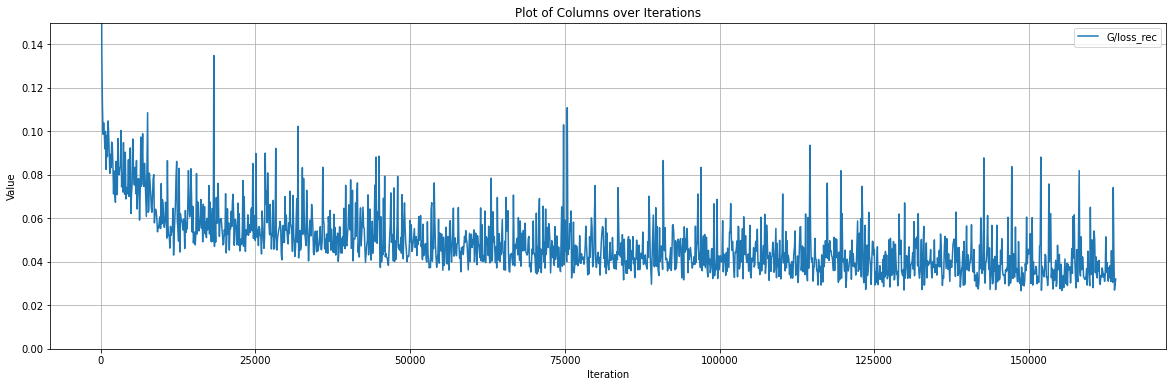

In [8]:
plot_columns(history, ['G/loss_rec'], logaxis=False, ylim=(0, 0.15))

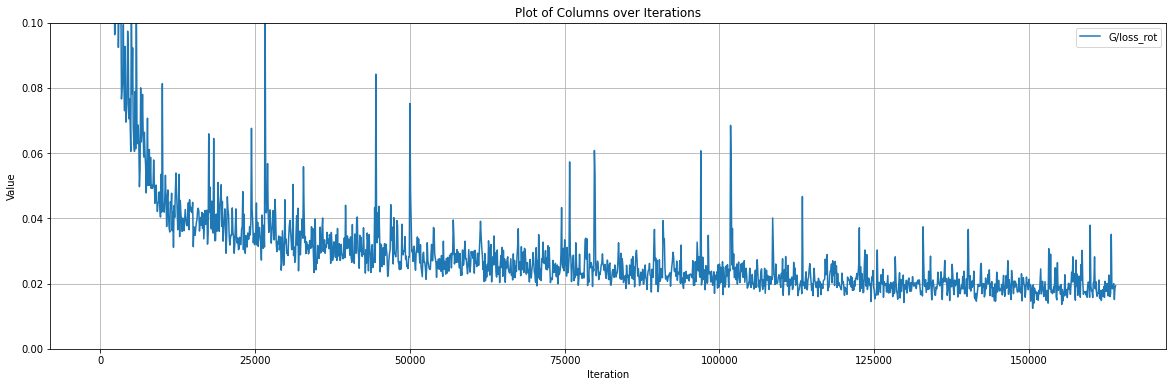

In [9]:
plot_columns(history, ['G/loss_rot'], logaxis=False, hline=False, ylim=(0, 0.1))

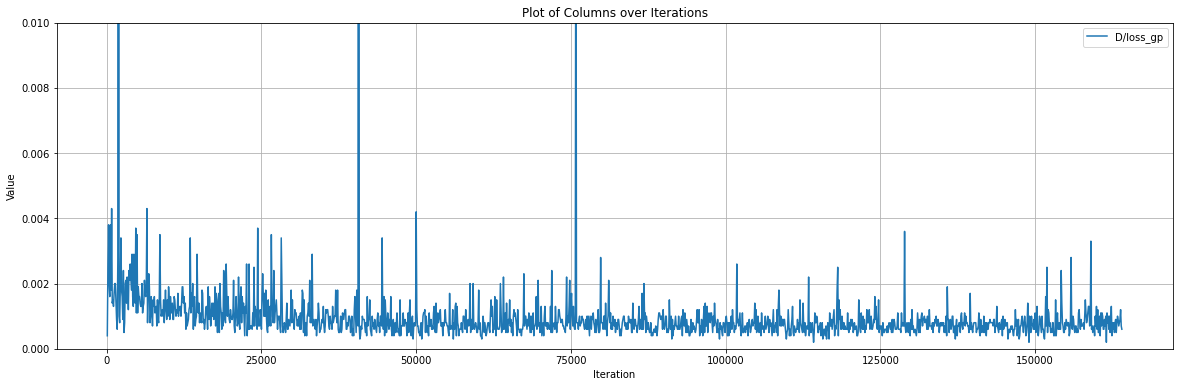

In [10]:
plot_columns(history, ['D/loss_gp'], logaxis=False, ylim=(0, 0.01))

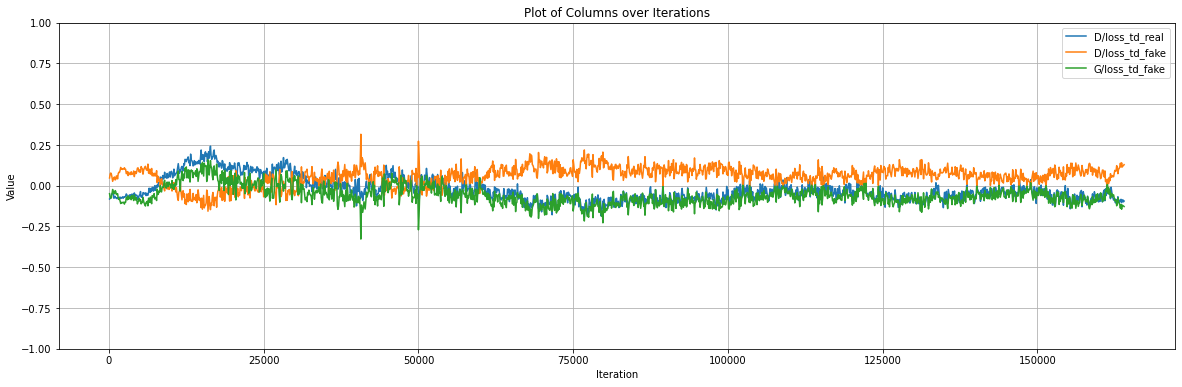

In [11]:
plot_columns(history, ['D/loss_td_real', 'D/loss_td_fake', 'G/loss_td_fake'], logaxis=False, hline=False, ylim=(-1, 1))

# Metrics

## TSTR Score

In [12]:
file_path = 'results/mobiact_realworld_TSTR.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,domain,loss,accuracy,f1
0,10000,61,1.198309,0.545,0.436710
1,10000,62,4.107186,0.255,0.110422
2,10000,63,1.890375,0.515,0.420766
3,10000,64,1.763045,0.420,0.296856
4,10000,65,1.084490,0.570,0.506921


Maximum average accuracy: 0.5297 at step 150000
Maximum average F1 score: 0.4738 at step 150000


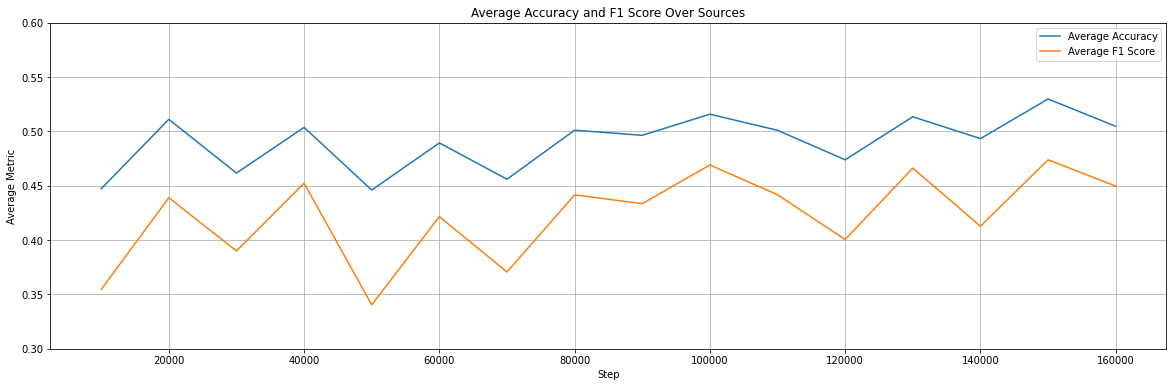

Minimum average loss: 1.9638 at step 10000


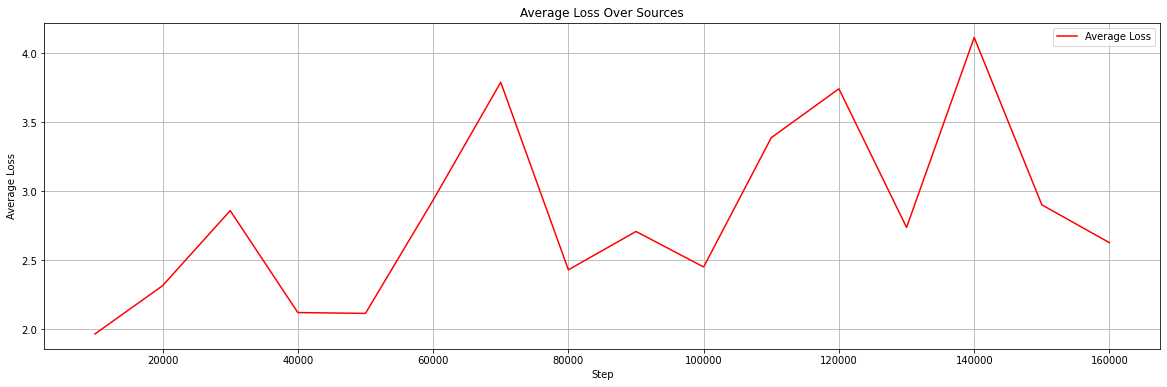

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(metrics, ylim=None):
    # Filter the DataFrame based on the metrics
    filtered_data = metrics

    # Group by 'step' and then calculate the mean across 'source' and 'domain'
    mean_data = filtered_data.groupby(['step']).agg({'accuracy': 'mean', 'f1': 'mean', 'loss': 'mean'}).reset_index()

    # Plotting accuracy and F1 scores in the same plot
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data['accuracy'], label='Average Accuracy')
    plt.plot(mean_data['step'], mean_data['f1'], label='Average F1 Score')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Find the maximum value of accuracy and F1 score and their corresponding steps
    max_accuracy = mean_data['accuracy'].max()
    max_accuracy_step = mean_data[mean_data['accuracy'] == max_accuracy]['step'].values[0]
    print(f'Maximum average accuracy: {max_accuracy:.4f} at step {max_accuracy_step}')
    
    max_f1 = mean_data['f1'].max()
    max_f1_step = mean_data[mean_data['f1'] == max_f1]['step'].values[0]
    print(f'Maximum average F1 score: {max_f1:.4f} at step {max_f1_step}')

    plt.title('Average Accuracy and F1 Score Over Sources')
    plt.xlabel('Step')
    plt.ylabel('Average Metric')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting loss in a separate plot
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data['loss'], label='Average Loss', color='red')
    
    # Find the minimum value of the loss and its corresponding step
    min_loss = mean_data['loss'].min()
    min_loss_step = mean_data[mean_data['loss'] == min_loss]['step'].values[0]
    print(f'Minimum average loss: {min_loss:.4f} at step {min_loss_step}')

    plt.title('Average Loss Over Sources')
    plt.xlabel('Step')
    plt.ylabel('Average Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_metrics(classification_scores, ylim=(0.3, 0.6))